In [6]:
from epi_models import (
    DeterministicCompartmentalModel, 
    DeterministicCompartmentalModelRunner,
    DeterministicCompartmentalModelScenario,
    SingleInterventionScenario, 
    CampParams,
)

In [7]:
camp_params = CampParams.load_from_json("/Users/billyzhaoyh/Desktop/AIforGoodSimulator/epi-models/epi_models/config/sample_input.json")

In [8]:
runner = DeterministicCompartmentalModelRunner(camp_params, num_iterations=10)

In [9]:
do_nothing_baseline, camp_baseline = runner.run_baselines()

In [12]:
better_hygiene_intervention_result, increase_icu_intervention_result, increase_remove_high_risk_result, \
               better_isolation_intervention_result, shielding_intervention_result = runner.run_different_scenarios()

In [14]:
sim_groups = do_nothing_baseline.groupby('R0')

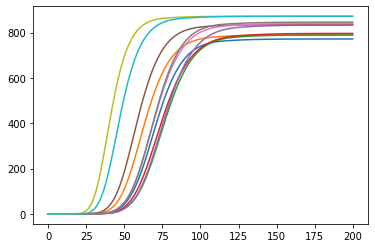

In [15]:
for index,group in sim_groups:
    group['Deaths'].plot()

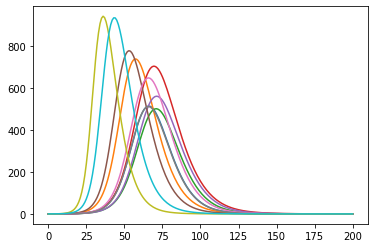

In [16]:
for index,group in sim_groups:
    group['Hospitalised'].plot()

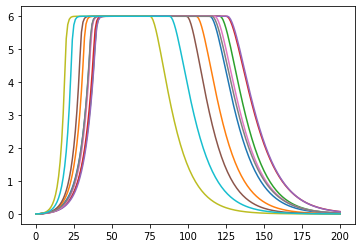

In [17]:
for index,group in sim_groups:
    group['Critical'].plot()

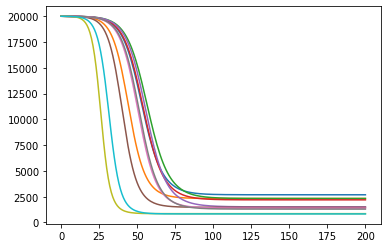

In [18]:
for index,group in sim_groups:
    group['Susceptible'].plot()

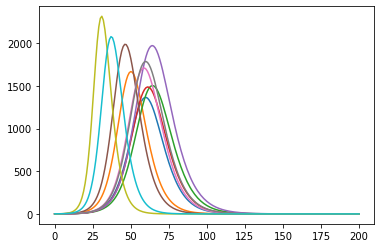

In [20]:
for index,group in sim_groups:
    group['Infected_symptomatic'].plot()

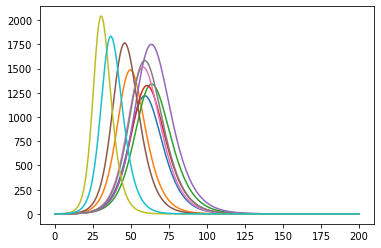

In [21]:
for index,group in sim_groups:
    group['Infected_asymptomatic'].plot()

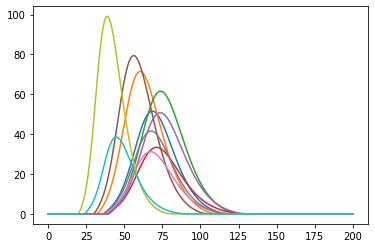

In [22]:
for index,group in sim_groups:
    group['No_ICU_Care'].plot()

In [23]:
sim_groups_camp = camp_baseline.groupby('R0')

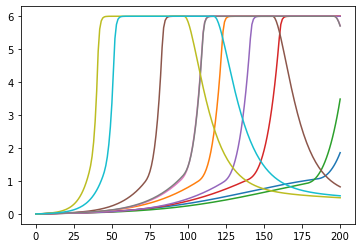

In [24]:
for index,group in sim_groups_camp:
    group['Critical'].plot()

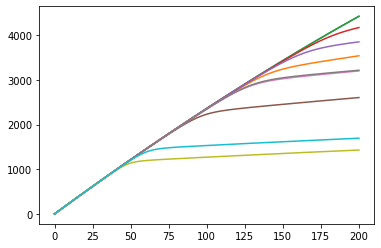

In [25]:
for index,group in sim_groups_camp:
    group['Offsite'].plot()

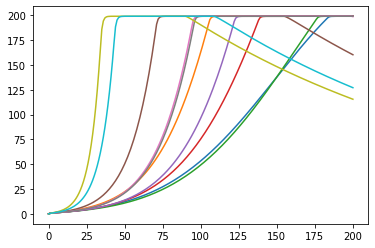

In [26]:
for index,group in sim_groups_camp:
    group['Quarantined'].plot()

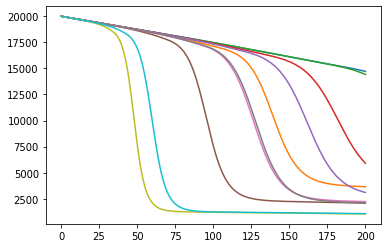

In [27]:
for index,group in sim_groups_camp:
    group['Susceptible'].plot()

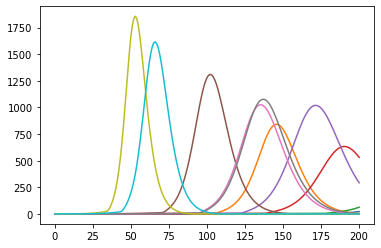

In [28]:
for index,group in sim_groups_camp:
    group['Infected_symptomatic'].plot()

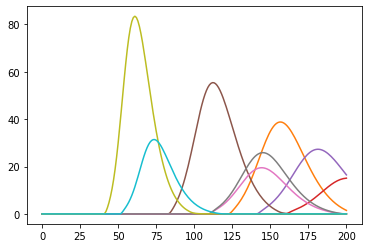

In [29]:
for index,group in sim_groups_camp:
    group['No_ICU_Care'].plot()

### Import the compartmental model and tinker with a few options
1. Single interventions
* better hygiene
* remove symptomatic (test out if the capacity implementation is working)
* increase ICU
* remove high risk
* shielding

In [31]:
model = DeterministicCompartmentalModel(camp_params)

In [32]:
better_hygiene_6_month = SingleInterventionScenario(camp_params.total_population, [0], [180], model.infection_matrix, transmission_reduction_factor_inter=0.7)

In [34]:
%%time
better_hygiene_6_month_results = model.run_single_simulation(better_hygiene_6_month)

CPU times: user 1min 39s, sys: 918 ms, total: 1min 40s
Wall time: 1min 43s


In [35]:
better_hygiene_6_month_groups = better_hygiene_6_month_results.groupby('R0')

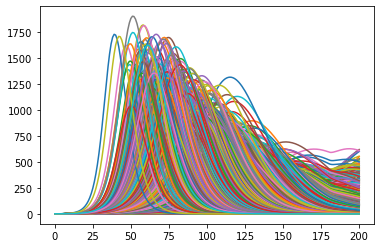

In [36]:
for index,group in better_hygiene_6_month_groups:
    group['Infected_symptomatic'].plot()

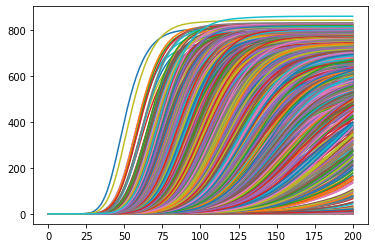

In [37]:
for index,group in better_hygiene_6_month_groups:
    group['Deaths'].plot()

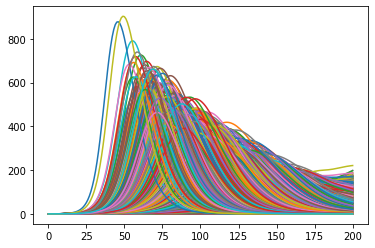

In [38]:
for index,group in better_hygiene_6_month_groups:
    group['Hospitalised'].plot()

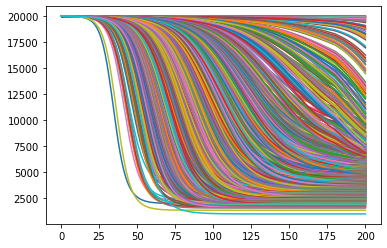

In [39]:
for index,group in better_hygiene_6_month_groups:
    group['Susceptible'].plot()

In [40]:
# test isolation
iso_6_month = SingleInterventionScenario(camp_params.total_population, [0], [180], model.infection_matrix, isolation_capacity_inter=10000, remove_symptomatic_rate_inter=10)

In [41]:
%%time
iso_6_month_results = model.run_single_simulation(iso_6_month, num_iterations=100)

TypeError: run_single_simulation() got an unexpected keyword argument 'num_iterations'

In [42]:
iso_6_month_results = camp_params.total_population * iso_6_month_results
iso_6_month_results_groups = iso_6_month_results.groupby('R0')

NameError: name 'iso_6_month_results' is not defined

In [ ]:
for index,group in iso_6_month_results_groups:
    group['Quarantined'].plot()

In [ ]:
for index,group in iso_6_month_results_groups:
    (group['Infected_symptomatic']+group['Quarantined']).plot()

In [17]:
# the Infected dynamics is tinted while they are in quarantine - needs a better solution to deal with this (maybe extra compartments is the answer like the Tucker model)